In [1]:
# This file is aimed to add Xe to the model and see if the model can be improved
from src.DataPrepocessing import *
from src.NeuralNets import *
from src.TrainMethod import *


import torch.optim as optim
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Training_time = 3

In [3]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

def eval(model, data, batch_size, sequence_length):
    # Assuming you have a DataSet object called 'training_data' and a trained model called 'model'
    training_set = data
    # Step 1: Create a DataLoader from your DataSet object
    batch_size = batch_size  # Adjust this value based on your model's input requirements
    train_loader = DataLoader(training_set, batch_size=batch_size, shuffle=False)

    # Step 2 & 3: Iterate through the DataLoader and collect predictions and true labels
    predictions = []
    true_labels = []

    sequence_length = sequence_length  # Assuming a sequence length of 10

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in train_loader:
            # Pass the input data to the trained model and collect the predictions
            preds = model(inputs)
            preds = preds.reshape(-1, sequence_length)  # Reshape the predictions to (batch_size, sequence_length, output_dim)
            predictions.extend(preds.squeeze().view(-1).tolist())  # Flatten the predictions
            true_labels.extend(labels.squeeze().view(-1).tolist())  # Flatten the true labels

    # Step 4: Plot the predictions and true labels for comparison
    loss = nn.MSELoss()
    tensor1 = torch.tensor(predictions)
    tensor2 = torch.tensor(true_labels)
    test_loss = loss(tensor1, tensor2)


    return test_loss

In [4]:
# def a training function that return a loss


def training_several_time(Training_time):

    sequence_length = 10
    batch_size = 16
    # num = 4

    loss_list = []
    offset_list = list(range(5,55,5))

    for offset in offset_list:
        loss_sum = 0
        for i in range(Training_time):
            test_file_name = f'Gamma_quantile_1_offset_{offset}.csv'
            train_file_name = f'Gamma_quantile_1_offset_{offset}.csv'

            # test_file_name = 'Gamma_Final_quantile_1.csv'
            # train_file_name = 'Gamma_Final_quantile_1.csv'

            # test_file_name = "Cs_Xe_shuffle_training.csv"
            # train_file_name = "Cs_Xe_shuffle_testing.csv"
            model_name = f'Gamma_quantile_1_offset_{offset}'


            train_test_split = 0.7

            data = np.loadtxt(f'./Processed Data/{train_file_name}', delimiter= ',', dtype= np.float64)
            ss = StandardScaler()
            data = ss.fit_transform(data)
            training_data = ReactorData(data,sequence_length,0,train_test_split)




            input_dim = training_data[0][0].shape[1]



            # print(output_dim)

            # some adjustable hyper-parameters
            nets_hyper_parameters = {
            'input_dim' : input_dim,
            'output_dim' : 1,
            'hidden_dim' : 256,
            'lstm_nums_layer' : 2,
            'dropout' : 0.2 
            }

            # save the hyper params as json

            def write_dict_to_json(data, file_path):
                with open(file_path, 'w') as json_file:
                    json.dump(data, json_file)

            write_dict_to_json(nets_hyper_parameters, f"./Model_params/{model_name}")


            model = SimpleLSTM(**nets_hyper_parameters)



            optimizer_parameters = {
            'params':model.parameters(),
            'lr' : 0.005,
            'weight_decay' : 0.005
            }


            train_parameters = {
                'model' : model,
                'training_data' : training_data,
                'epoch_num': 100,
                'batch_size': batch_size,
                'optimizer' : optim.Adam(**optimizer_parameters),
                'loss_fn' : nn.MSELoss(),
                'print_out_frequency': float('inf'),
                'shuffle': True,

            }


            model, _ = train(** train_parameters)

            hard_run_data = np.loadtxt(f'./Processed Data/{test_file_name}', delimiter= ',', dtype= np.float64)

            hard_ss = StandardScaler()

            hard_run_data = hard_ss.fit_transform(hard_run_data)
            hard_run_dataset = ReactorData(hard_run_data, sequence_length, 0 ,1)

            loss =  eval(model ,hard_run_dataset, batch_size, sequence_length)

            loss_sum += loss

        loss_sum = loss_sum/Training_time
        loss_list.append(loss_sum)


    return offset_list ,loss_list
        


In [5]:
offset_list, loss_list = training_several_time(Training_time)

[[-1.96296575]
 [-1.70379028]
 [-1.22739026]
 [-0.32351344]
 [-0.41416631]
 [-0.54736385]
 [ 0.42668588]
 [ 0.43975149]
 [ 0.15051635]
 [ 0.985956  ]
 [ 0.93661264]
 [ 1.49526969]
 [ 1.56485229]
 [ 1.3362845 ]
 [ 1.42554116]
 [ 1.65033284]
 [ 1.85268394]
 [ 1.61585748]
 [ 1.93918286]
 [ 1.34171837]
 [ 2.02420504]
 [ 2.37388337]
 [ 1.65666384]
 [ 1.78144801]
 [ 1.56337939]
 [ 1.48568998]
 [ 2.17430329]
 [ 1.87754602]
 [ 1.40446569]
 [ 1.49814299]
 [ 1.00606525]
 [ 0.8844114 ]
 [ 0.30514053]
 [-0.06589877]
 [-0.34718979]
 [-0.79216367]
 [-0.41475989]
 [-0.7651083 ]
 [-0.83182712]
 [-0.78912409]
 [-1.58600861]
 [-1.17636337]
 [-1.4200167 ]
 [-1.91872555]
 [-1.22406568]
 [-1.69614458]
 [-1.93886359]
 [-2.1270482 ]
 [-2.23205502]
 [-2.46977378]
 [-1.87958283]
 [-1.97038969]
 [-2.29894821]
 [-2.06259656]
 [-1.86162393]
 [-2.09838912]
 [-1.54264033]
 [-1.11797187]
 [-0.96494473]
 [-0.82271138]
 [-0.77310768]
 [-0.59367384]
 [ 0.0943695 ]
 [ 0.17512167]
 [ 0.75397745]
 [ 0.10163482]
 [ 0.00401

In [6]:
loss_list

[tensor(0.5334),
 tensor(0.4350),
 tensor(0.3951),
 tensor(0.3224),
 tensor(0.1781),
 tensor(0.1855),
 tensor(0.1602),
 tensor(0.3308),
 tensor(0.1883),
 tensor(0.1860)]

Text(0.5, 1.0, 'Average Loss versus Offset')

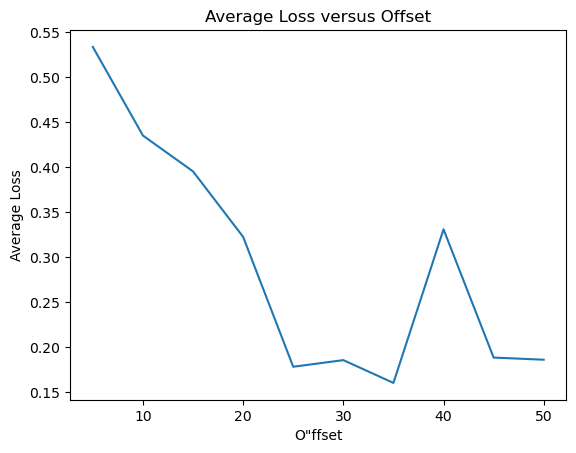

In [9]:
plt.plot(offset_list, loss_list)
plt.xlabel('O"ffset')
plt.ylabel('Average Loss')
plt.title('Average Loss versus Offset')